# Parte II: Experimentação

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
dataset = np.fromfile("./data/dataAll.txt", dtype=np.float64)

In [3]:
dataset.shape

(3000,)

## Redimensionando o dataset

In [4]:
dataset = dataset.reshape(1000,3)

### Adicionando o viés ($x_0 = -1$)

In [5]:
vies = -1 * np.ones((dataset.shape[0], 1))

In [6]:
valores = np.hstack((vies, dataset))

## Modelando o Perceptron

In [7]:
class Perceptron:
    def __init__(self, intervalo, ativacao, tamanho_input):
        self.intervalo = intervalo
        self.ativacao = ativacao
        self.pesos = np.random.uniform(self.intervalo[0], self.intervalo[1], size=tamanho_input)
        self.ajustes = 0

    def __str__(self):
        cabecalho = "Perceptron de Rosenblatt\n"
        numero_ajustes = f"Número de ajustes: {self.ajustes}\n"
        pesos = f"Pesos: w0 = {self.pesos[0]}; w1 = {self.pesos[1]}; w2 = {self.pesos[2]}\n"
        return (cabecalho + numero_ajustes + pesos)

    def get_pesos(self):
        return self.pesos
    
    def get_ajustes(self):
        return self.ajustes
    
    def ajuste_pesos(self, novos_pesos):
        self.pesos = novos_pesos
        self.ajustes += 1
    
    def foward(self, X):
        u = np.dot(X, self.pesos)
        y = self.ativacao(u)
        return y



## Regra Delta

In [8]:
def regra_delta(omega, x_n, erro, eta=0.1):
    novos_pesos = omega + eta * erro * x_n
    return novos_pesos

## Função de treino

In [9]:
def train(valores, neuronio: Perceptron, eta=0.1):
    epocas = 0
    aprender = True

    while aprender:
        epocas += 1
        aprender = False
        for val in valores:
            x_n = val[:3]
            y_chapeu = neuronio.foward(x_n)
            y_d = val[3]
            e = y_d - y_chapeu
            if e != 0:
                aprender = True
                novos_pesos = regra_delta(neuronio.get_pesos(), x_n, eta)
                neuronio.ajuste_pesos(novos_pesos)
    
    return (neuronio.get_ajustes(), epocas)


In [10]:
def degrau(x, tetha=0):
    if x-tetha < 0:
        return 0
    return 1

In [11]:
np.random.seed(9)
tamanho_input = valores.shape[1] - 1 
neuronio = Perceptron((-0.5, 0.5), degrau, tamanho_input)

In [13]:
ajustes, epocas = train(valores, neuronio, eta=0.1)

In [18]:
print(f"O treinamento terminou em {epocas} épocas e com {ajustes} ajustes nos pesos")

O treinamento terminou em 16 épocas e com 694 ajustes nos pesos


In [19]:
print(neuronio)

Perceptron de Rosenblatt
Número de ajustes: 694
Pesos: w0 = -7.4296258461141855; w1 = 111.89175059214895; w2 = -111.6767997068657



In [16]:
w0, w1, w2 = neuronio.get_pesos()

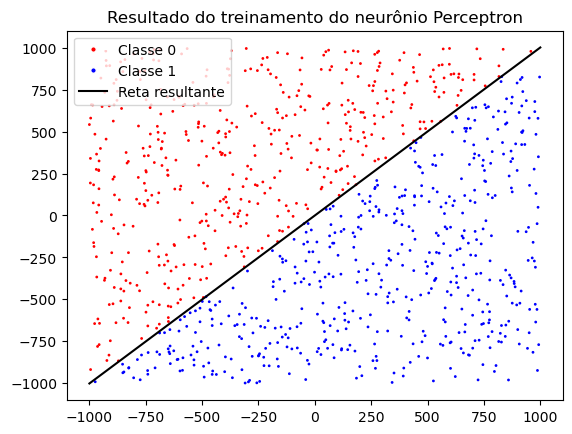

In [35]:
cores = ['red' if y == 0 else 'blue' for y in dataset[:, 2]]

plt.scatter(dataset[:, 0], dataset[:, 1], c=cores, s=1)
x = np.linspace(-1000, 1000, 100)
plt.plot(x, w0/w2 - x * w1/w2, c='k')
legenda = [
       Line2D([0], [0], marker='o', color='w', label='Classe 0',
           markerfacecolor='red', markersize=4),
       Line2D([0], [0], marker='o', color='w', label='Classe 1',
           markerfacecolor='blue', markersize=4),
       Line2D([], [], color='k', linestyle='-', label='Reta resultante')
]
plt.legend(handles=legenda)
plt.title("Resultado do treinamento do neurônio Perceptron")
plt.show()